In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


 # Data Analysis of San Francisco Evictions

 Currently, San Francisco and the Bay Area are struggling with a difficult housing crisis. We've all heard the stories of people living out of their RVs, people paying extorbitant rents to live in tiny apartments, and the growing prevalence of homeless people. While news outlets have covered the housing crisis extensively, San Francisco's Eviction Data may hold clues to aspects that have not yet been deeply reported in the news.

 Within the San Francisco Evictions data set, there are a number of data points we can examine. Most of the data points revolve around a reason for eviction, and our group decided to tackle the reasons in hopes of encountering interesting findings that could either challenge our assumptions about the housing crisis or affirm information we already had.

 The original source of data can be found here: https://data.sfgov.org/Housing-and-Buildings/Eviction-Notices/5cei-gny5/data

 <font color=blue>Lines 4-5 allow us to import the eviction data and read it into Jupyter Notebook</font>

In [78]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataScience.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass



/home/fabienne/Desktop


In [79]:
#importing the file and datetime and pandas
from datetime import datetime as dt
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')
url = "https://data.sfgov.org/api/views/5cei-gny5/rows.csv?accessType=DOWNLOAD"
evictions = pd.read_csv(url, parse_dates=['File Date'])


 <font color=blue>Before looking at our data, the code below cleans it by changing all of the columns to snake_case and deleting trailing white space.</font>

In [80]:
#making the column names look pretty
evictions.columns = evictions.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '')


 <font color=blue>In this step we confirm the changes made above and make an assessment of the dataset, in addition to checking for missing values.</font>

In [81]:
#look at the names and the values
evictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40178 entries, 0 to 40177
Data columns (total 29 columns):
eviction_id                           40178 non-null object
address                               40178 non-null object
city                                  40176 non-null object
state                                 40176 non-null object
eviction_notice_source_zipcode        39495 non-null object
file_date                             40178 non-null datetime64[ns]
non_payment                           40178 non-null bool
breach                                40178 non-null bool
nuisance                              40178 non-null bool
illegal_use                           40178 non-null bool
failure_to_sign_renewal               40178 non-null bool
access_denial                         40178 non-null bool
unapproved_subtenant                  40178 non-null bool
owner_move_in                         40178 non-null bool
demolition                            40178 non-null bool
c

 ## Get Acquainted with the Data

 In looking at all of the column headers of our data, we can see the full picture of all the information the San Francisco Government has collected. Here, we can look at reasons for evictions, we can also do analysis by neighborhood or location. Notice that the first column is 'eviction_id'. We can identify this value as unique, and it will help us down the line when we need to identify how many evictions, along with other analysis moving forward.

 <font color=blue>This code serves to group by 'eviction_id' and filter duplicates. The category of 'eviction_id' is supposed to uniquely identify each eviction. Therefore, if any records have the same number, it reveals there are duplicates within the data set.</font>

In [82]:
#check if there are duplicate values 
evictions.groupby(by='eviction_id').filter(lambda x: len(x)>1)



,eviction_id,address,city,state,eviction_notice_source_zipcode,file_date,non_payment,breach,nuisance,illegal_use,...,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints_date,supervisor_district,neighborhoods__analysis_boundaries,location


In [83]:
#check if the nunique matches the row count - nunique is # of unique values
evictions.eviction_id.nunique()



40178

In [84]:
#check the zipcodes
evictions['eviction_notice_source_zipcode'].describe()



count     39495.0
unique       70.0
top       94110.0
freq       4052.0
Name: eviction_notice_source_zipcode, dtype: float64

In [85]:
#check the unique values in the zipcodes, data needs standardization
evictions['eviction_notice_source_zipcode'].unique()



array([94121.0, 94122.0, 94110.0, 94109.0, 94131.0, 94118.0, 94123.0,
       94124.0, 94102.0, 94132.0, 94114.0, 94103.0, 94133.0, 94117.0,
       94112.0, 94116.0, 94115.0, 94105.0, 94127.0, 94134.0, 94107.0,
       94108.0, 94158.0, nan, 94111.0, 94130.0, 94129.0, 94104.0, 94159.0,
       94101.0, 94135.0, 94144.0, '94109', '94133', '94112', '94118',
       '94117', '94121', '94131', '94102', '94123', '94115', '94116',
       '94103', '94122', '94132', '94127', '94114', '94110', '94111',
       '94134', '94105', '94124', '94107', '94108', '94104', '94130',
       '94126', '941', '9411', '94', '9', '94113', '9413', '9412', '9410',
       '941 1', '91011', '941??', '9132', '94129'], dtype=object)

In [86]:
#fix zipcode one
evictions[evictions['eviction_notice_source_zipcode'] == '941 1']
evictions.at[35204, 'eviction_notice_source_zipcode'] = '941'



In [87]:
#fix zipcode two
evictions[evictions['eviction_notice_source_zipcode'] == '941??']
evictions.at[35414, 'eviction_notice_source_zipcode'] = '941'



In [88]:
#convert the zipcode field into a float and then an integer
evictions['eviction_notice_source_zipcode'] = evictions['eviction_notice_source_zipcode'].astype(float).fillna(0.0)
evictions['eviction_notice_source_zipcode'] = evictions['eviction_notice_source_zipcode'].astype(int)


 <font color=blue>Lines 10-14 isolated zipcode information and then cleaned it by eliminating white space and finally converted them from floats to integers.</font>

In [89]:
#check what the zipcode field looks like
evictions.eviction_notice_source_zipcode.head(10)



0    94121
1    94122
2    94110
3    94109
4    94109
5    94110
6    94131
7    94122
8    94118
9    94122
Name: eviction_notice_source_zipcode, dtype: int64

In [90]:
#get all the values that are lower than 94101 which is the lowest real zipcode

missing = evictions.loc[evictions['eviction_notice_source_zipcode'] < 94101, ['address']]



In [91]:
#check the number of missing values
#Here we check the count of the 'missing' values - which means we check the count of all of the incomplete zipcodes
missing.count()


address    822
dtype: int64

 <font color=blue>Steps 16-17 gather the zipcodes that are incomplete. Some zipcodes have 4 or less numbers and are not full zip codes - and finding those values helps us identify the dirty data.</font>

 Despite the attempts to standardize and clean the zip code data, after we ran 'count()' on the number of missing zip codes, we learned that there are 822 records with incomplete or missing zip codes.
 We were hoping to do some analysis by zip code - but after vetting this data and seeing that it was incomplete, any analysis on that particular category would be incomplete.


In [92]:
#check the info field for the names of the reason fields
#With this piece of code, we searched through the reason column to ensure all rows had data in them. 
evictions.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40178 entries, 0 to 40177
Data columns (total 29 columns):
eviction_id                           40178 non-null object
address                               40178 non-null object
city                                  40176 non-null object
state                                 40176 non-null object
eviction_notice_source_zipcode        40178 non-null int64
file_date                             40178 non-null datetime64[ns]
non_payment                           40178 non-null bool
breach                                40178 non-null bool
nuisance                              40178 non-null bool
illegal_use                           40178 non-null bool
failure_to_sign_renewal               40178 non-null bool
access_denial                         40178 non-null bool
unapproved_subtenant                  40178 non-null bool
owner_move_in                         40178 non-null bool
demolition                            40178 non-null bool
ca

In [93]:
#group by the reason fields, get the frequency for every combination and sort high to low 
evictions.groupby(['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends']).size().reset_index().sort_values(0, ascending=False).head(10)



,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,substantial_rehab,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,0
25,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,10018
69,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,8007
48,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5643
12,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,3867
99,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2211
16,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,1496
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,1474
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,1261
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,1211
19,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1129


In [94]:
#get it into a variable
#The reasons data extracted above is now created into a variable. 
reasons = evictions.groupby(['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends'], as_index=False).size().reset_index().sort_values(0, ascending=False)


 <font color=blue>The code above displays the data by the reason categories, then it computes how often the sequence of False/True/etc comes up in a data set. We then use reset index to create a dataframe which allows for more data manipulation than a series does. It then sorts the count by descending and are looking at the top 10 pieces of data.</font>

In [95]:
#rename the frequency column to 'frequency'
reasons.rename(columns={0 : 'frequency'}, inplace=True)



In [96]:
#add a true_count field that shows how many reasons are listed for the eviction
reasons['true_count'] = (reasons[['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends']] == True).sum(axis=1)


 <font color=blue>In this line above, we create a variable called 'true_count'  which checks all the boolean values in each column specified for each row and checks how often the 'true' value occurs and counts it.
 When a value comes back as true, that means that under that specific column, in that row, it affirms the reason for that eviction. A false value means that reason was flagged as false for the eviction.In rows with 0 in 'true_count' there was no reason given for the eviction.</font>

In [97]:
#sort on the true_count for the lowest values to see how many missing values there are
reasons.sort_values('true_count').head(10)


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,321,0
25,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,10018,1
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,8,1
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,8,1
38,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,69,1
10,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,114,1
36,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,210,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,362,1
42,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,533,1
31,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,656,1


 <font color=blue>Sorting on 'true_count' shows you - in ascending order - if there are any rows with a '0' count, which turn out to be evictions with no reason given. The frequency tells you how many of those rows come up in the data.</font>

 ## Analysis

 If a row returns false for every eviction reason, it means they gave no eviction reason. For the table above, the only row with no eviction reasons is the first row. From this information we can reasonably conclude that in 321 evictions, the records cite no reason.
 To take that a step further, 321 evictions might have happened for no reason at all. In the context of a housing crisis, that number is unsettling. It is important to remember that this number is of all evictions from 1997 to 2017 - so the number of evictions per year with no reason given will be much less. It is also possible that within the eviction process, someone forgot to file the paper work and no reason was assigned to that particular case.

In [98]:
#sort on the highest values to see which records have the most reasons
reasons.sort_values('true_count', ascending=False).head(10)



,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count
96,False,True,True,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,1,5
93,False,True,True,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,1,4
122,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,3,4
59,False,False,True,False,False,False,True,False,False,True,...,False,False,False,False,True,False,False,False,1,4
66,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,True,False,False,False,1,4
97,False,True,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,1,4
98,False,True,True,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,9,4
119,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,2,4
121,True,True,True,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,1,4
92,False,True,True,False,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,1,4


In [99]:
#check the top reasons to see how many true counts they have
reasons.head(10)



,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,ellis_act_withdrawal,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count
25,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,10018,1
69,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,8007,1
48,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,5643,1
12,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,3867,1
99,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,2211,1
16,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,1496,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,1474,1
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,1261,1
7,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,1211,1
19,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,1129,1


In [100]:
#add the true_count to the evictions field as well
evictions['true_count'] = (evictions[['non_payment', 'breach', 'nuisance', 'illegal_use', 'failure_to_sign_renewal', 'access_denial', 'unapproved_subtenant', 'owner_move_in', 'demolition', 'capital_improvement', 'substantial_rehab', 'ellis_act_withdrawal', 'condo_conversion', 'roommate_same_unit', 'other_cause', 'late_payments', 'lead_remediation', 'development', 'good_samaritan_ends']] == True).sum(axis=1)



In [101]:
#check the records with no reasons
evictions[evictions.true_count == 0].reset_index().sort_values('true_count', ascending=False).head(10)


,index,eviction_id,address,city,state,eviction_notice_source_zipcode,file_date,non_payment,breach,nuisance,...,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,constraints_date,supervisor_district,neighborhoods__analysis_boundaries,location,true_count
0,216,M172755,1400 Block Of Mcallister Street,San Francisco,CA,94115,2017-11-01,False,False,False,...,False,False,False,False,False,NaN,5.0,Western Addition,"(37.77816383880218, -122.4358853193284)",0
161,20372,S000423,800 Block Of 14th Street,San Francisco,CA,0,1997-10-01,False,False,False,...,False,False,False,False,False,NaN,8.0,Castro/Upper Market,"(37.767507076087114, -122.43173994211207)",0
219,28951,E982286,300 Block Of Scott Street,San Francisco,CA,94117,1998-09-25,False,False,False,...,False,False,False,False,False,NaN,5.0,Haight Ashbury,"(37.77289055160434, -122.43558909120165)",0
218,28727,M2K2018,2000 Block Of Bush Street,San Francisco,CA,94115,2000-10-05,False,False,False,...,False,False,False,False,False,NaN,5.0,Pacific Heights,"(37.787390085206, -122.43100178067202)",0
217,28694,M101625,100 Block Of Broderick Street,San Francisco,CA,94117,2010-11-09,False,False,False,...,False,False,False,False,False,NaN,5.0,Haight Ashbury,"(37.771514703010105, -122.43887242213414)",0
216,28512,RE02355,1000 Block Of Dolores Street,San Francisco,CA,0,1997-07-22,False,False,False,...,False,False,False,False,False,NaN,8.0,Mission,"(37.752643924449465, -122.4250877782395)",0
215,28464,M020362,400 Block Of Valencia Street,San Francisco,CA,94103,2002-03-26,False,False,False,...,False,False,False,False,False,NaN,8.0,Mission,"(37.76612594583041, -122.42207304920552)",0
214,28459,M051729,300 Block Of South Van Ness,San Francisco,CA,94102,2005-08-26,False,False,False,...,False,False,False,False,False,NaN,9.0,Mission,"(37.76760099952863, -122.41779278798714)",0
213,28416,M2K2553,1400 Block Of Shafter Avenue,San Francisco,CA,94124,2000-12-26,False,False,False,...,False,False,False,False,False,NaN,10.0,Bayview Hunters Point,"(37.72940484926397, -122.38795985825239)",0
212,28375,M030654,2800 Block Of Sacramento Street,San Francisco,CA,94115,2002-05-10,False,False,False,...,False,False,False,False,False,NaN,2.0,Pacific Heights,"(37.78904760859322, -122.43978096945591)",0


 <font color=blue>The code above created the table we see now. We have 'true-count' for reasons - which is a subset of the full dataset. Evictions is the full data set - in this line, we are adding the 'true-count' column to the original dataset. This allows us to create a variable with all the complete records that have no reason given for evictions, which is potentially helpful in future analysis.</font>

In [102]:
#put it into a variable
no_reason = evictions[evictions.true_count == 0].reset_index().sort_values('true_count', ascending=False)


 <font color=blue>This line creates a variable called no reason - which isolates eviction records that have a true count of 0, then the values are sorted - althought all values are 0.</font>

 Before, we checked evictions with no given reason within the 'reasons' variable. Now we are double-checking the evictions with no given reason within the entire data set. We get the same 321 count that we did when we did the initial check.
 This is another way of vetting the data, making sure that information is consistent across different variables as we illustrated above.


In [103]:
#check how many empty records there are
no_reason.eviction_id.nunique()



321

In [104]:
#function to get the name of the column where the reason is true
def get_name(row):
    b = reasons.loc[row.name] == True
    item = []
    for key, value in b.items():
        if key != 'frequency' and key != 'true_count':
            if value == True:
                item.append(key)

    b['value'] = item
    return b['value']



In [105]:
#same but for the evictions dataframe
def evic_name(row):
    b = evictions.loc[row.name] == True
    item = []
    for key, value in b.items():
        if key != 'frequency' and key != 'true_count':
            if value == True:
                item.append(key)

    b['value'] = item
    return b['value']


 <font color=blue>The piece of code above isolates the row name, where the boolean value is true. It returns that information for the reasons dataframe and then for the evictions dataframe as well.</font>

 The two lines of code below then add the reason name to every record - then it allows you to see side by side with the 'true_count' what the reason was for that particular eviction record. Technically you could find this same information by going through each reason column until you find 'True' but this way saves you a whole lot of time and allows you to analyze the data more intuitively.


In [106]:
#add the reason to the dataframe reasons
reasons['reason'] = reasons.apply(get_name, axis=1)



In [107]:
#add the reason to the dataframe evictions
evictions['reason'] = evictions.apply(evic_name, axis=1)



In [108]:
#clean the reason column, standardize
reasons['reason'] = reasons['reason'].astype(str)
reasons.reason = reasons.reason.str.strip('[').str.strip(']').str.replace("'", "").str.strip()



In [109]:
#clean the reason column, standardize
evictions['reason'] = evictions['reason'].astype(str)
evictions.reason = evictions.reason.str.strip('[').str.strip(']').str.replace("'", "").str.strip()



In [110]:
#check what it looks like
reasons.head()


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count,reason
25,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,10018,1,owner_move_in
69,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,8007,1,breach
48,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,5643,1,nuisance
12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,3867,1,ellis_act_withdrawal
99,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2211,1,non_payment


 ## Analysis

 The table above shows the results of the code from a few lines ago. By scrolling all the way to the right, you can find the most important information in this data set. The frequency of records that have a true count for 'owner_move_in' is 10,018. Automatically, we learn that owner moveins are one of the highest reasons for eviction in San Francisco. This is interesting to think about because this piece of information brings up so many questions. Are the owners just moving in temporarily to fix up the place and then rent at higher rates? Are owners themselves having a hard time finding housing and thus have to resort to moving out their tenants? And, who are all those loud neighbors that made so much noise the owners had to move them out?
 Good data creates questions to investigate - and within each of these questions there is a potential story.

In [111]:
#check what it looks like
#This line illustrates the reason variable - and it shows what eviction records with multiple reasons looks like
reasons.tail()


,non_payment,breach,nuisance,illegal_use,failure_to_sign_renewal,access_denial,unapproved_subtenant,owner_move_in,demolition,capital_improvement,...,condo_conversion,roommate_same_unit,other_cause,late_payments,lead_remediation,development,good_samaritan_ends,frequency,true_count,reason
92,False,True,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,1,4,"breach, nuisance, access_denial, late_payments"
64,False,False,True,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,1,3,"nuisance, illegal_use, other_cause"
33,False,False,False,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,1,2,"unapproved_subtenant, other_cause"
95,False,True,True,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,1,4,"breach, nuisance, illegal_use, late_payments"
61,False,False,True,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,1,3,"nuisance, access_denial, late_payments"


 ## Analysis

 Now at the tail end of the same table we looked at previously, we learn that there are evictions with multiple true counts, meaning there was more than one reason driving the eviction. Apparently, some of the eviction records have four reasons. Most of the records for San Francisco evictions only have one reason, so the finding that some eviction records have multiple reasons driving the eviction is a neat finding. Again, these data points just bring more questions that can turn into potential stories. It seems that the eviction records with more than one reason show that in some ways, allowances might have been given by some owners. Perhaps it shows an owner's willingness to try and work with their tenants. On the other hand, the fact that there are so few records with multiple reasons might actually give the opposite impression. Lastly, that data was not explicitly collected, and so there is no way to tell (except with further investigation, of course!)

In [112]:
#get a new variable with just the reason and the frequency
top_reasons = reasons[['reason', 'frequency']]



In [113]:
#check what it looks like
top_reasons.head(10)



,reason,frequency
25,owner_move_in,10018
69,breach,8007
48,nuisance,5643
12,ellis_act_withdrawal,3867
99,non_payment,2211
16,capital_improvement,1496
4,late_payments,1474
5,other_cause,1261
7,roommate_same_unit,1211
19,demolition,1129


[Text(0,0,'owner_move_in'),
 Text(0,0,'breach'),
 Text(0,0,'nuisance'),
 Text(0,0,'ellis_act_withdrawal'),
 Text(0,0,'non_payment'),
 Text(0,0,'capital_improvement'),
 Text(0,0,'late_payments'),
 Text(0,0,'other_cause'),
 Text(0,0,'roommate_same_unit'),
 Text(0,0,'demolition')]

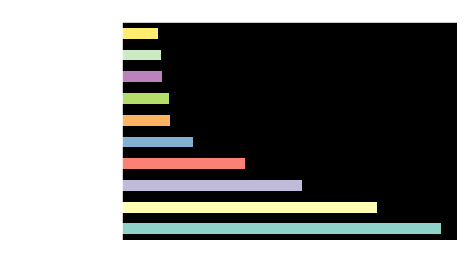

In [114]:
#make a chart of the top ten reasons of all time
chart = top_reasons.head(10).frequency.plot.barh(title='Top Eviction Reasons Of All Time')
chart.set_yticklabels(top_reasons.reason)


 In the bar graph above, the results of the table with eviction reasons and the frequency is displayed in ascending order. By looking at this chart, you can read the top eviction reason and you can see how far ahead that reason is compared to the one that comes next in line. The top 5 reasons have sizeable gaps in between each other, but the bottom 5 reasons are not that different from each other in frequency. All of this information is readable on the table above, but it is more quickly understood through this data visualization.

In [115]:
#check the date field in the evictions dataframe
evictions.file_date.describe()



count                   40178
unique                   5460
top       2012-08-16 00:00:00
freq                      240
first     1997-01-02 00:00:00
last      2019-01-29 00:00:00
Name: file_date, dtype: object

In [116]:
#setting the year column by extracting the year
evictions['year'] = pd.to_datetime(evictions['file_date'], format = '%Y,%m,%d').dt.year


 Creating this column will allow us to make more detailed analysis of the data - seeing the top reasons behind evictions in San Francisco over time can reveal trends about the data that are not decipherable by looking at all the data grouped together.

In [117]:
#check if we have all the values from 1997-2019
evictions.year.unique()



array([2017, 2013, 1999, 1997, 2014, 2006, 2004, 2012, 2001, 2002, 2000,
       1998, 2016, 2010, 2009, 2008, 2007, 2005, 2003, 2015, 2011, 2018,
       2019])

In [118]:
#clean up the reason column again because I got a weird error here
evictions['reason'] = evictions['reason'].astype(str)
evictions.reason = evictions.reason.str.strip('[').str.strip(']').str.replace("'", "").str.strip()



In [119]:
#make a new variable grouped by the reason and the year
reason_year = evictions.groupby(['reason', 'year']).size().reset_index().sort_values(0, ascending=False)



In [120]:
#check the head, the first 10 values to determine which reason for eviction in descending order by frequency, with the year added
reason_year.head(10)



,reason,year,0
924,owner_move_in,1998,1373
923,owner_move_in,1997,1057
926,owner_move_in,2000,883
925,owner_move_in,1999,779
927,owner_move_in,2001,694
70,breach,2014,621
71,breach,2015,573
69,breach,2013,491
928,owner_move_in,2002,469
67,breach,2011,468


In [121]:
#rename frequency column
reason_year.rename(columns={0 : 'frequency'}, inplace=True)



In [122]:
#get the sorted values, first by year then frequency
top_year = reason_year.sort_values(['year', 'frequency'], ascending=False)



In [123]:
#top for 2018
top_2018 = top_year[top_year.year == 2018]


 While it is great to look at specific eviction reasons over time, it is valuable to hone in on a particular year, especially if it is the year that just passed. The code above will allow us to make more detailed analysis of the data. This step can help  reveal trends about the data that are not decipherable by looking at all the data grouped together.

In [124]:
#set reason as index
top_2018 = top_2018.set_index('reason')



In [125]:
#check the head
top_2018.head()



,year,frequency
reason,,
breach,2018,390
nuisance,2018,272
capital_improvement,2018,215
owner_move_in,2018,186
ellis_act_withdrawal,2018,157


In [126]:
#drop the year column
top_2018 = top_2018.drop(['year'], axis=1)



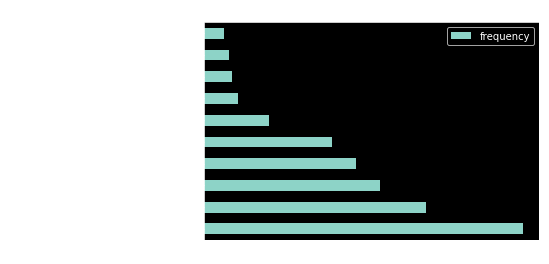

In [127]:
#plot
top_2018.head(10).plot.barh(title='Top Reasons for Eviction in 2018')


 ## Analysis

 This chart illustrates the reasons for eviction by frequency in ascending order. It allows you to visualize immediately how much more breaches cause evictions over any other category and also shows that 'nuisance' while being a close second, is not necessarily that close behind. Although 'owner_move_in' is the highest reason for evictions overall, in 2018, it came in fourth. Also, 'breach' the reason with the most evictions was far ahead in driving evictions in 2018. This specific data points brings up many questions, such as: What is causing all of these breaches in renting contracts? Are there different breaches of contract that can be broken down into subcategories? And if so, what can those categories be? The reason the question of subcategories comes up for us is because the breaches in contract far outpaced any other reason for eviction in 2018, and it would be helpful to see what is actually behind those numbers.

In [128]:
#get the values for nuisance over the years
top_nuisance = top_year[top_year.reason == 'nuisance']



In [129]:
#drop the reason
top_nuisance = top_nuisance.drop(['reason'], axis=1)



In [130]:
#drop 2019
top_nuisance = top_nuisance.drop([749])



In [131]:
#set year as index
top_nuisance = top_nuisance.set_index('year')


In [132]:
import matplotlib.ticker as ticker


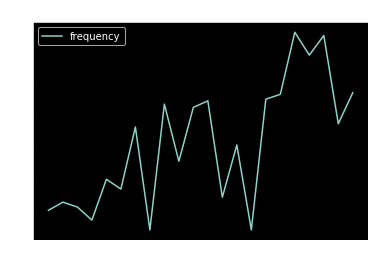

In [133]:
#plot
#Here we plotted how Nuisances as a reason for eviction changed overtime. 
nuisance_chart = top_nuisance.plot(title='Nuisance Evictions 1997-2017')
nuisance_chart.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


 Nuisance evictions over time, when we imagine a trend line, seem to have gone quite a bit over time. Another interesting point is that there were several huge dips and several huge spikes over the years.

In [134]:
#all the same but for breach
top_breach = top_year[top_year.reason == 'breach']



In [135]:
top_breach = top_breach.drop(['reason'], axis=1)



In [136]:
top_breach = top_breach.drop([75])



In [137]:
top_breach = top_breach.set_index('year')



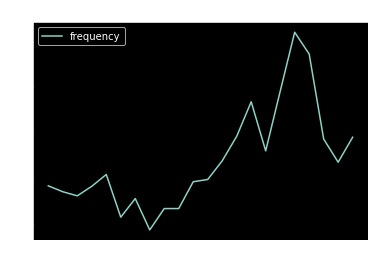

In [138]:
breach_chart = top_breach.plot(title='Breach Evictions 1997-2017')
breach_chart.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


 Here we have the same as above, a line chart that plots breaches as the reason for eviction over time. This chart reveals a finding that is not easily decipherable by looking at the raw data. Although Breaches are the top reason for eviction in 2018, eviction breaches have been much higher in past years. In 2015, San Francisco had almost double the amount of eviction for breaches that it had for 2018 - Surely there is a story there that can be uncovered with further research.

In [139]:
#same but for owner
top_owner = top_year[top_year.reason == 'owner_move_in']



In [140]:
#Sorted owner move in eviction records by year
top_owner.sort_values('year')



,reason,year,frequency
923,owner_move_in,1997,1057
924,owner_move_in,1998,1373
925,owner_move_in,1999,779
926,owner_move_in,2000,883
927,owner_move_in,2001,694
928,owner_move_in,2002,469
929,owner_move_in,2003,318
930,owner_move_in,2004,305
931,owner_move_in,2005,223
932,owner_move_in,2006,194


In [141]:
top_owner = top_owner.drop(['reason'], axis=1)



In [142]:
top_owner = top_owner.drop([945])



In [143]:
#owner move in evictions frequency in the last 5 years
top_owner.head()



,year,frequency
944,2018,186
943,2017,265
942,2016,342
941,2015,378
940,2014,275


In [144]:
top_owner = top_owner.set_index('year')



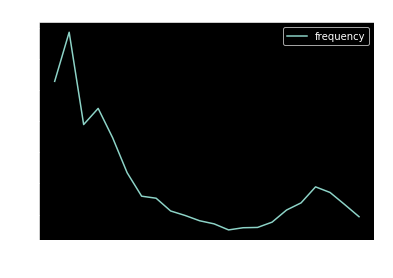

In [145]:
#plots owner move in evictions over the years
owner_chart = top_owner.plot(title='Owner Move-in Evictions 1997-2017')
owner_chart.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


 This chart illustrates how 'owner_move_in' reasons for eviction have in some ways trailed off in the 20 year period illustrated by this graph.

 ## Finding:
 20 years ago, evictions for owner move-ins peaked at 1400 evictions. In 2017, there's a little over 200. That is a significant drop. Potentially, this can mean that owners had the capital to not sublet or lease out apartments they owned, which in turn can allow them to move in. This could also highlight factors outside of our data such as how affordable it is to live in San Francisco - either way, this line chart shows a huge discrepancy in where owner move-in evictions are and where they were 20 years ago.

In [146]:
#get top three reasons of all time
three_reasons = ['owner_move_in', 'breach', 'nuisance']



In [147]:
#make a list with those values
top_three = top_year[top_year.reason.isin(three_reasons)]



In [148]:
top_three = top_three.drop([75, 749, 945])



In [149]:
top_three.head(10)



,reason,year,frequency
74,breach,2018,390
748,nuisance,2018,272
944,owner_move_in,2018,186
73,breach,2017,335
943,owner_move_in,2017,265
747,nuisance,2017,253
72,breach,2016,386
942,owner_move_in,2016,342
746,nuisance,2016,307
71,breach,2015,573


In [150]:
#make a pivot table
top_pivot = top_three.pivot(index='year', columns='reason', values='frequency')


 <font color=blue>Making a pivot table that includes each eviction reason, the year and the frequency, helps us look at all 3 reasons side by side.</font>


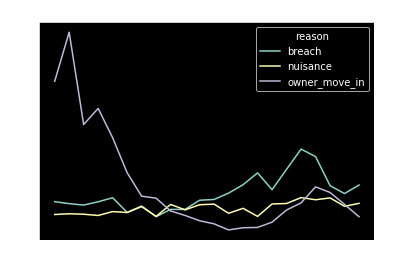

In [151]:
#This piece of code plots the pivot table made above
pivot_chart = top_pivot.plot(title='Top 3 Eviction Reasons 1997-2017')
pivot_chart.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))


 ## Analysis

 Another Finding is that Nuisance evictions seem to stay relatively close to the same frequency - while owner move in and breaches are a bit more sporadic. The last interesting finding is that owner move ins for the late 1990s were pretty high - surely with more investigation, one could find an interesting story there. Lastly, looking at the 2007-2010 part of the graph, owner move-ins dipped -I think you can reasonably conclude that the financial crisis had an effect on that and had an effect on breaches of contract - as people likely struggled to pay their rent while facing layoffs and underemployment.